### Recognition of Actors using PCA and SVM

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

%matplotlib inline

In [3]:
# pip install scikit-image

In [4]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [5]:
dwane_jhonson=os.listdir("C:/Users/Admin/AI - CSE/Dwane jhonson")

In [6]:
ryan_ronalds=os.listdir("C:/Users/Admin/AI - CSE/Ryan Ronalds")

In [7]:
rdj=os.listdir("C:/Users/Admin/AI - CSE/robert downety junior")

In [8]:
#b2-reading image as a matrix of number

limit=10
dj_image=[None]*limit
j=0
for i in dwane_jhonson:
    if(j<limit):
        dj_image[j]=imread("C:/Users/Admin/AI - CSE/Dwane jhonson/"+i)
        j+=1
    else:
        break

In [9]:
limit=10
rr_image=[None]*limit  
j=0
for i in ryan_ronalds:
    if(j<limit):
        rr_image[j]=imread("C:/Users/Admin/AI - CSE/Ryan Ronalds/"+i)
        j+=1
    else:
        break

In [10]:
limit=10
rdj_image=[None]*limit
j=0
for i in rdj:
    if(j<limit):
        rdj_image[j]=imread("C:/Users/Admin/AI - CSE/robert downety junior/"+i)
        j+=1
    else:
        break

In [11]:
# convert the img into gray scale

dj_gray=[None]*limit
j=0
for i in  dj_image:
    if(j<limit):
        dj_gray[j]=rgb2gray(dj_image[j])
        j+=1
    else:
        break

In [12]:
rr_gray=[None]*limit
j=0
for i in  rr_image:
    if(j<limit):
        rr_gray[j]=rgb2gray(rr_image[j])
        j+=1
    
    else:
        break

In [13]:
rdj_gray=[None]*limit
j=0
for i in  rdj_image:
    if(j<limit):
        rdj_gray[j]=rgb2gray(rdj_image[j])
        j+=1
    
    else:
        break

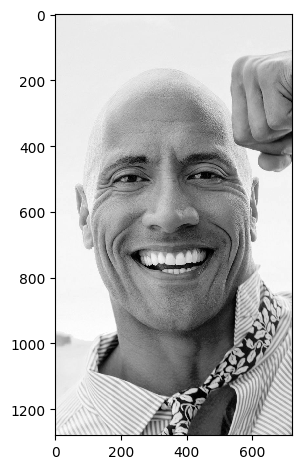

In [14]:
imshow(dj_gray[1])

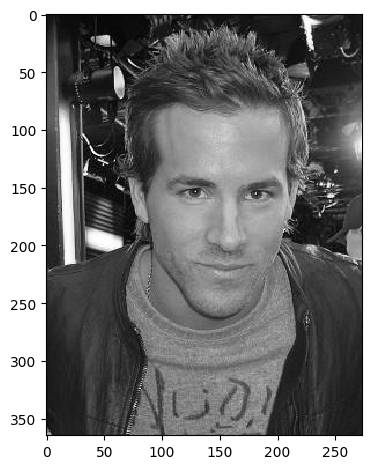

In [15]:
imshow(rr_gray[1])

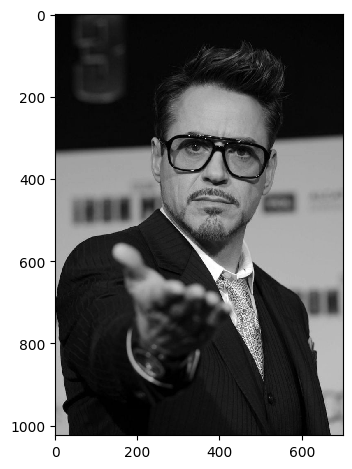

In [16]:
imshow(rdj_gray[1])

In [17]:
# matrix resizing

for j in range(10):
    dj_re=dj_gray[j]
    dj_gray[j]=resize(dj_re,(500,500))

In [18]:
for j in range(10):
    rr_re=rr_gray[j]
    rr_gray[j]=resize(rr_re,(500,500))

In [19]:
for j in range(10):
    rdj_re=rdj_gray[j]
    rdj_gray[j]=resize(rdj_re,(500,500))

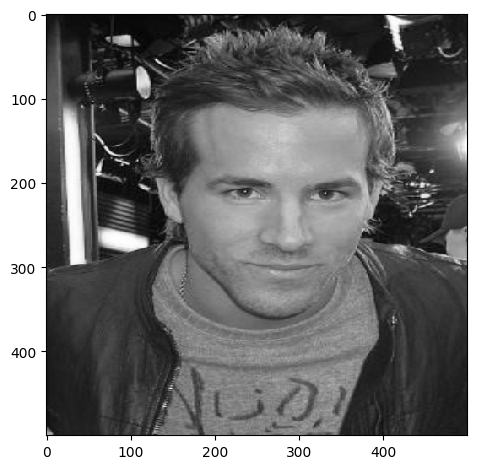

In [20]:
imshow(rr_gray[1])

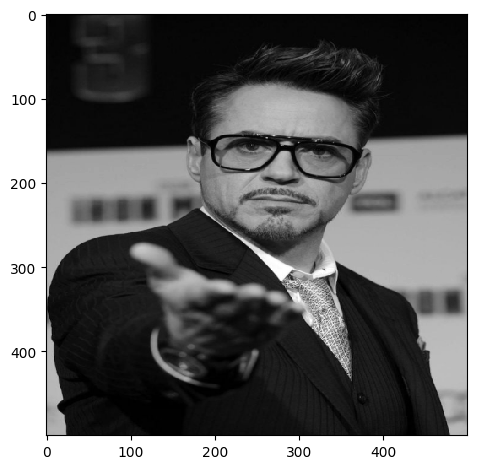

In [21]:
imshow(rdj_gray[1])

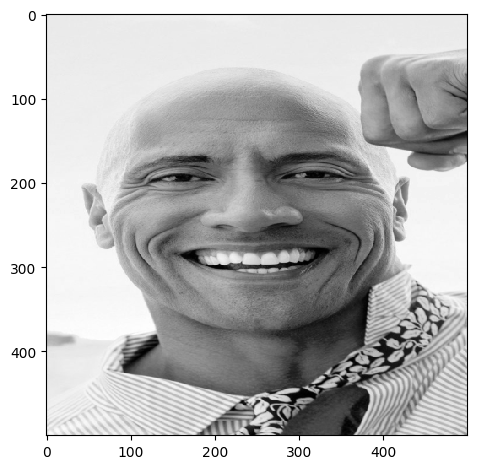

In [22]:
imshow(dj_gray[1])

In [23]:
len_of_image_dj=len(dj_gray)
len_of_image_dj

10

In [24]:
len_of_image_rr=len(rr_gray)
len_of_image_rr

10

In [25]:
len_of_image_rdj=len(rdj_gray)
len_of_image_rdj

10

In [26]:
# flatten the image

image_size_dj=dj_gray[2].shape
image_size_dj

(500, 500)

In [27]:
image_size_rr=rr_gray[2].shape
image_size_rr

(500, 500)

In [28]:
image_size_rdj=rdj_gray[2].shape
image_size_rdj

(500, 500)

In [29]:
flatten_size_dj=image_size_dj[0]*image_size_dj[1]
flatten_size_dj # multiplication of 500 and 500

250000

In [30]:
flatten_size_rr=image_size_rr[0]*image_size_rr[1]
flatten_size_rr # multiplication of 500 and 500

250000

In [31]:
flatten_size_rdj=image_size_rdj[0]*image_size_rdj[1]
flatten_size_rdj # multiplication of 500 and 500

250000

In [32]:
# now flatten the image from (500,500) marrix to 250000,1 vector

for i in range(len_of_image_dj):
    dj_gray[i]=np.ndarray.flatten(dj_gray[1]).reshape(flatten_size_dj,1)

In [33]:
for i in range(len_of_image_rr):
    rr_gray[i]=np.ndarray.flatten(rr_gray[1]).reshape(flatten_size_rr,1)

In [34]:
for i in range(len_of_image_rdj):
    rdj_gray[i]=np.ndarray.flatten(rdj_gray[1]).reshape(flatten_size_rdj,1)

In [35]:
# now stack the individual images array element into one array

dj_gray=np.dstack(dj_gray)
dj_gray.shape

(250000, 1, 10)

In [36]:
rr_gray=np.dstack(rr_gray)
rr_gray.shape

(250000, 1, 10)

In [37]:
rdj_gray=np.dstack(rdj_gray)
rdj_gray.shape

(250000, 1, 10)

In [38]:
# now if needed change the axis of the array elements

dj_gray=np.rollaxis(dj_gray,axis=2,start=0)
dj_gray.shape

(10, 250000, 1)

In [39]:
rr_gray=np.rollaxis(rr_gray,axis=2,start=0)
rr_gray.shape

(10, 250000, 1)

In [40]:
rdj_gray=np.rollaxis(rdj_gray,axis=2,start=0)
rdj_gray.shape

(10, 250000, 1)

In [41]:
dj_gray=dj_gray.reshape(len_of_image_dj,flatten_size_dj)
dj_gray.shape

(10, 250000)

In [42]:
rr_gray=rr_gray.reshape(len_of_image_rr,flatten_size_rr)
rr_gray.shape

(10, 250000)

In [43]:
rdj_gray=rdj_gray.reshape(len_of_image_rdj,flatten_size_rdj)
rdj_gray.shape

(10, 250000)

In [44]:
dj_data=pd.DataFrame(dj_gray)
dj_data

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
0,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.881296,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639
1,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.881296,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639
2,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.881296,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639
3,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.881296,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639
4,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.881296,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639
5,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.881296,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639
6,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.881296,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639
7,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.881296,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639
8,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.881296,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639
9,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.881296,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639


In [45]:
rr_data=pd.DataFrame(rr_gray)
rr_data

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
0,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113924,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254
1,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113924,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254
2,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113924,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254
3,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113924,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254
4,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113924,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254
5,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113924,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254
6,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113924,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254
7,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113924,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254
8,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113924,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254
9,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113924,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254


In [46]:
rdj_data=pd.DataFrame(rdj_gray)
rdj_data

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
0,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.704296,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063
1,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.704296,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063
2,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.704296,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063
3,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.704296,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063
4,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.704296,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063
5,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.704296,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063
6,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.704296,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063
7,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.704296,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063
8,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.704296,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063
9,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.704296,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063


In [47]:
dj_data['label']='Dwane Jhonson'
dj_data

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
1,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
2,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
3,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
4,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
5,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
6,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
7,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
8,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
9,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson


In [48]:
rr_data['label']='Ryan Ronalds'
rr_data

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254,Ryan Ronalds
1,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254,Ryan Ronalds
2,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254,Ryan Ronalds
3,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254,Ryan Ronalds
4,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254,Ryan Ronalds
5,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254,Ryan Ronalds
6,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254,Ryan Ronalds
7,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254,Ryan Ronalds
8,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254,Ryan Ronalds
9,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.08305,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.12209,0.122254,Ryan Ronalds


In [49]:
rdj_data['label']='Robert Downey Jr.'
rdj_data

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063,Robert Downey Jr.
1,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063,Robert Downey Jr.
2,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063,Robert Downey Jr.
3,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063,Robert Downey Jr.
4,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063,Robert Downey Jr.
5,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063,Robert Downey Jr.
6,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063,Robert Downey Jr.
7,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063,Robert Downey Jr.
8,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063,Robert Downey Jr.
9,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063,Robert Downey Jr.


In [50]:
actor_1 = pd.concat([dj_data,rr_data])

In [51]:
actor = pd.concat([actor_1,rdj_data])

In [52]:
actor

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
1,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
2,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
3,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
4,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
5,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
6,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
7,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
8,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
9,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson


In [53]:
from sklearn.utils import shuffle

In [54]:
# suffle the data that are presented in the data frame

actor_index = shuffle(actor).reset_index()
actor_index

,index,0,1,2,3,4,5,6,7,8,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,7,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
1,2,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
2,0,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.083050,0.081165,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.122090,0.122254,Ryan Ronalds
3,4,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.083050,0.081165,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.122090,0.122254,Ryan Ronalds
4,3,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
5,8,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
6,8,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.083050,0.081165,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.122090,0.122254,Ryan Ronalds
7,3,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,...,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063,Robert Downey Jr.
8,7,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.083050,0.081165,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.122090,0.122254,Ryan Ronalds
9,4,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson


In [55]:
actor_index = actor_index.drop(['index'],axis=1)
actor_index

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
1,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
2,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.083050,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.122090,0.122254,Ryan Ronalds
3,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.083050,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.122090,0.122254,Ryan Ronalds
4,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
5,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson
6,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.083050,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.122090,0.122254,Ryan Ronalds
7,0.038685,0.033043,0.023529,0.015839,0.012752,0.012752,0.015686,0.015686,0.015686,0.015686,...,0.702096,0.700629,0.700629,0.700629,0.700629,0.700629,0.700063,0.700063,0.700063,Robert Downey Jr.
8,0.068018,0.068866,0.073704,0.078194,0.082576,0.084592,0.085916,0.083050,0.081165,0.081704,...,0.113912,0.116759,0.120763,0.120526,0.119835,0.120458,0.121155,0.122090,0.122254,Ryan Ronalds
9,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,0.911421,...,0.876843,0.862457,0.849202,0.804779,0.657523,0.568078,0.570257,0.553449,0.593639,Dwane Jhonson


In [56]:
actor_index.to_csv('Actors.csv')

In [57]:
x = actor_index.values[:,:-1]

In [58]:
y = actor_index.values[:,-1]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5, random_state=0)

In [61]:
x_train.shape

(15, 250000)

In [62]:
x_test.shape

(15, 250000)

In [63]:
y_train.shape

(15,)

In [64]:
y_test.shape

(15,)

In [65]:
from sklearn import decomposition

In [66]:
pca = decomposition.PCA(n_components = 15, whiten = True, random_state=1)

In [67]:
pca.fit(x_train)

PCA(n_components=15, random_state=1, whiten=True)

In [68]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [69]:
x_train_pca.shape

(15, 15)

In [70]:
x_test_pca.shape

(15, 15)

In [71]:
eigen = (np.reshape(x[10],(500,500)).astype(np.float64))

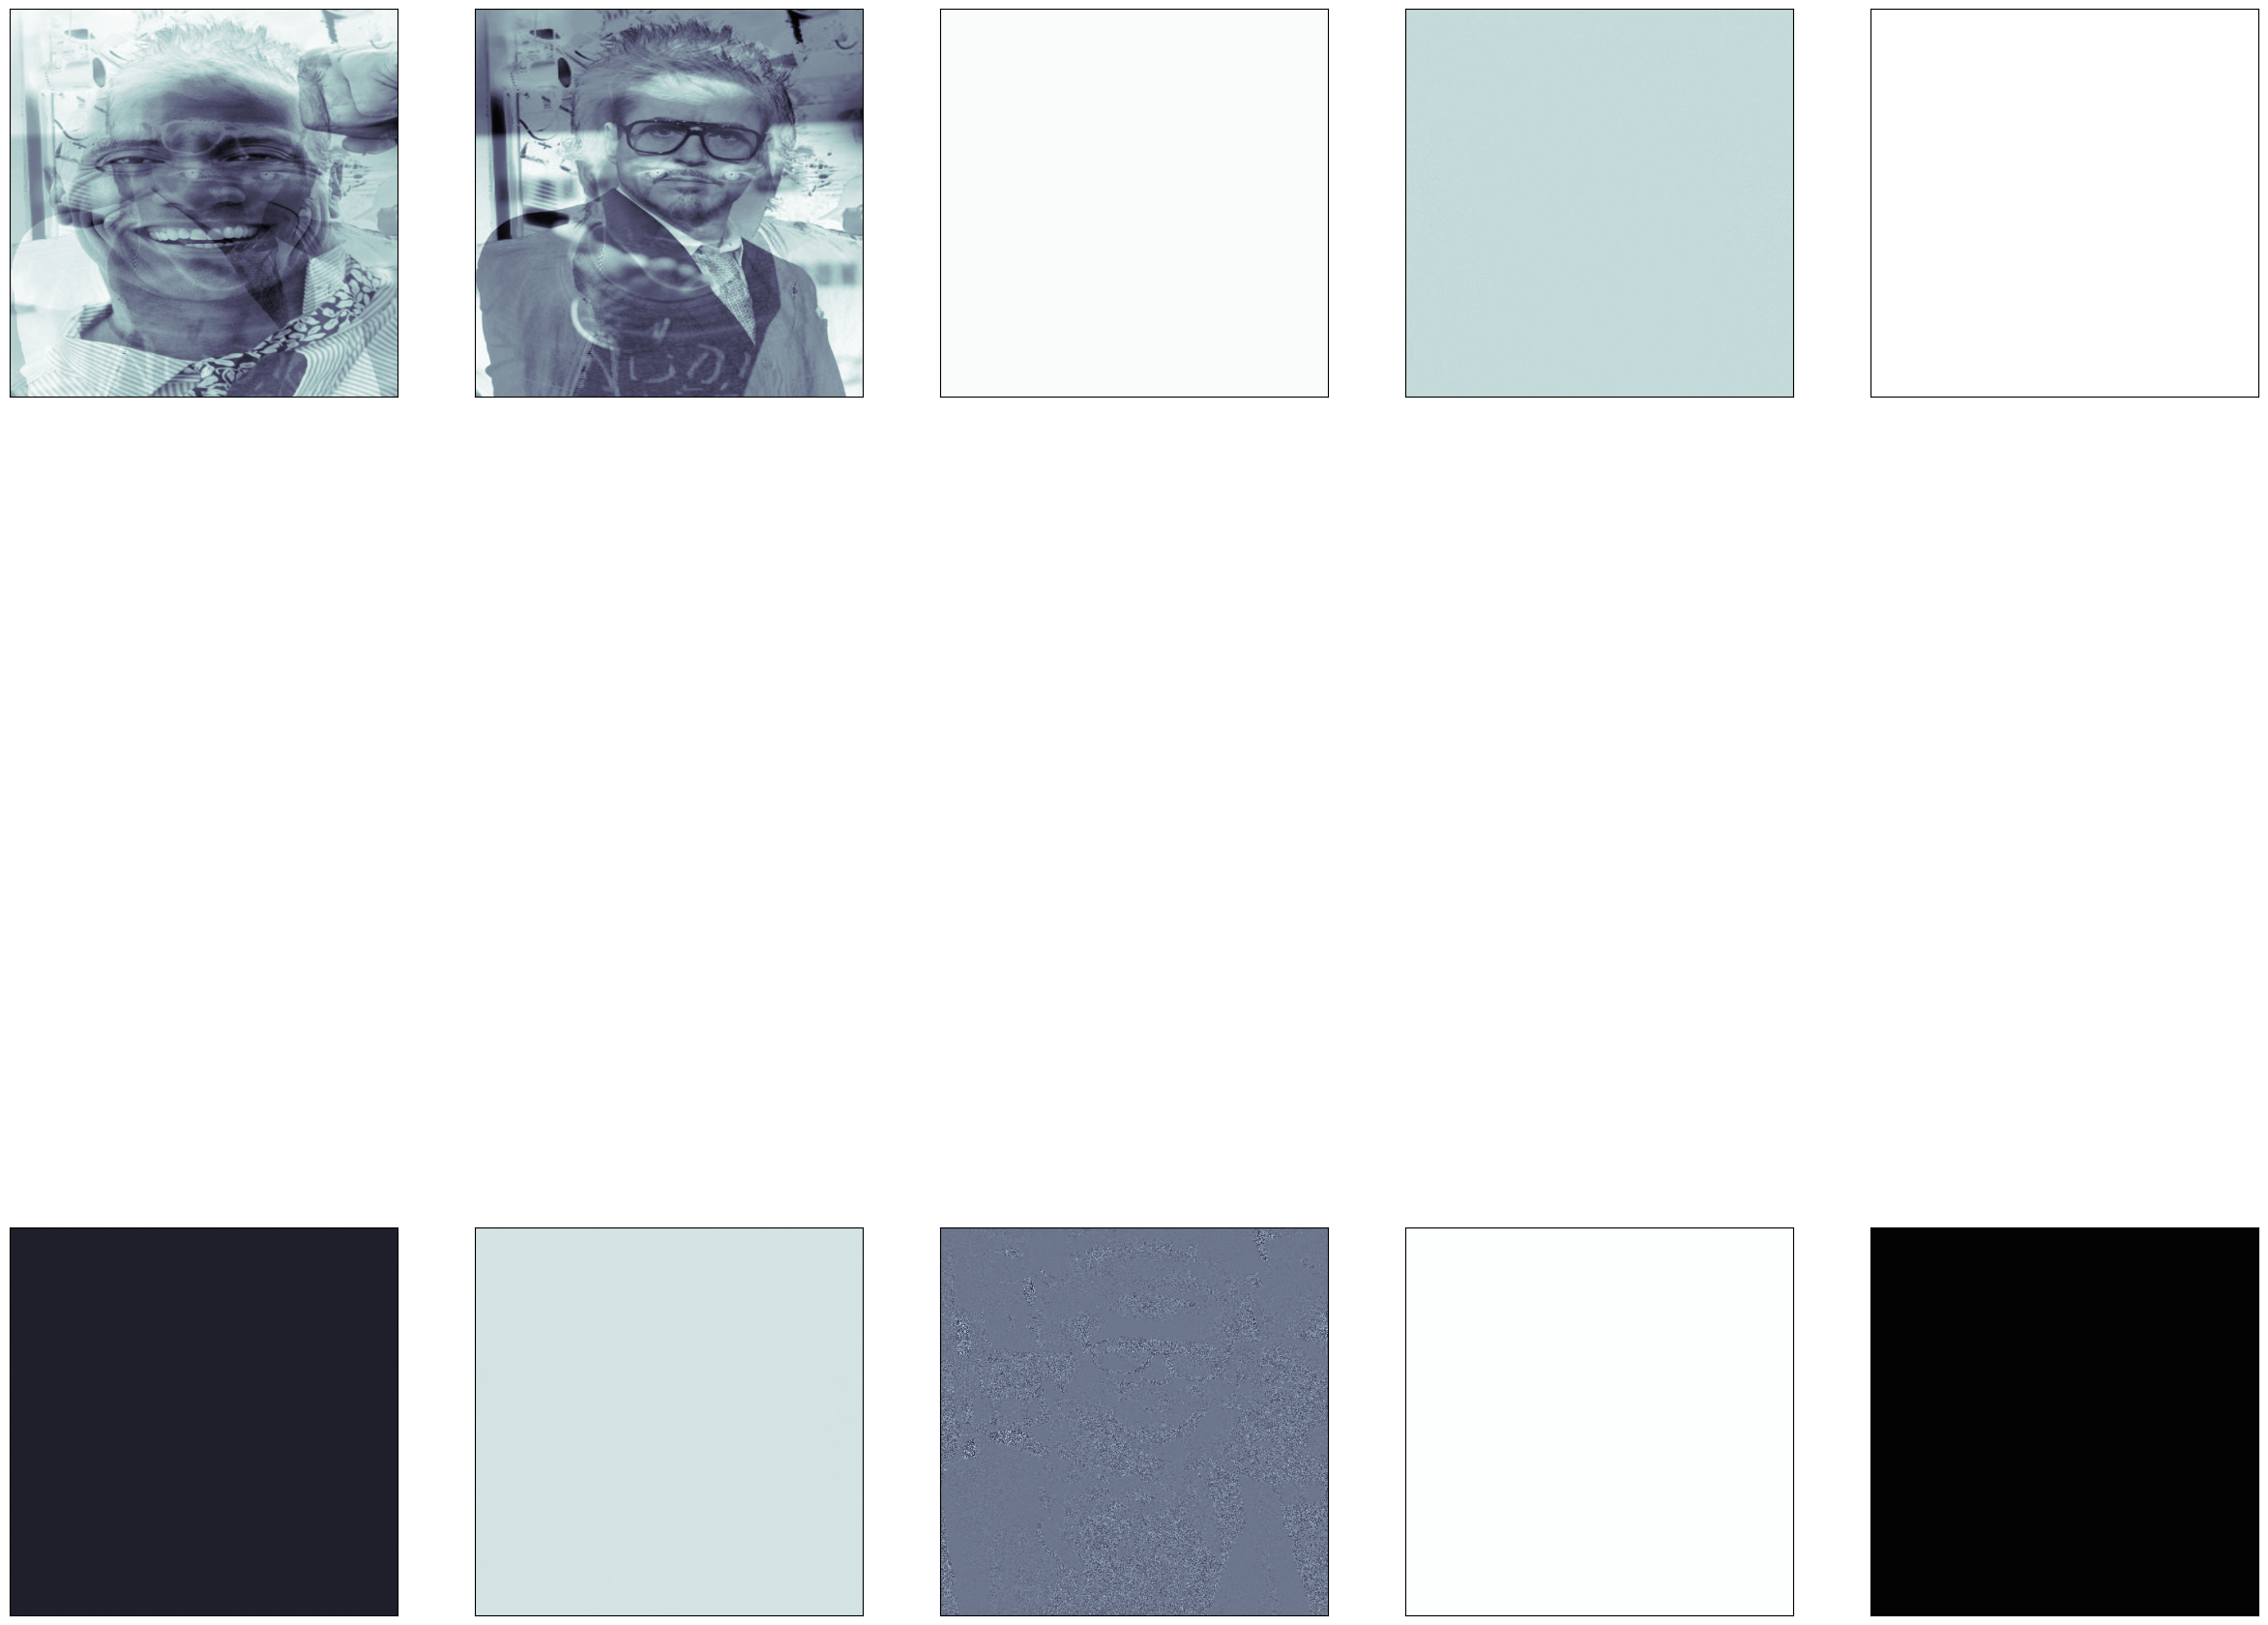

In [72]:
fig = pt.figure(figsize=(30,30))
for i in range(10):
    ax = fig.add_subplot(2,5, i+1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape), cmap=pt.cm.bone)

In [73]:
from sklearn import svm

In [ ]:
clf = svm.SVC((=2,gama=0))